<a href="https://colab.research.google.com/github/leejunho12316/NLP-study/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np

#1. 데이터 준비

In [89]:
num_words = 2000 #단어 빈도수 높은 n개만 가져옵니다
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)

#2. 데이터 탐색

In [90]:
#1행짜리 리스트 여러개로 이루어져 있다.
x_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 1037, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55, 2, 92, 617, 

In [91]:
#x_train의 label들로 이루어져있다.
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [92]:
print("-----x_train-----")
print("shape : ", x_train.shape)
print("data type : ", x_train.dtype)
print("data[0] type : ", type(x_train[0]))
print("x_train 각 list들의 길이 : ", [len(x_train[i]) for i in range(0,100)])
print('뉴스 기사의 최대 길이 :{}'.format(max(len(sample) for sample in x_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

print("\n-----y_train-----")
print("shape : ", y_train.shape)
print("data type : ", y_train.dtype)
print("data[0] type : ", y_train[0].dtype)
print("라벨 값 전체 : ", np.unique(y_train))

print("\n-----Data Example-----")
print("x Data : ", x_train[0])
print("y Data : ", y_train[0])

-----x_train-----
shape :  (8982,)
data type :  object
data[0] type :  <class 'list'>
x_train 각 list들의 길이 :  [87, 56, 139, 224, 101, 116, 100, 100, 82, 106, 31, 59, 65, 316, 527, 76, 114, 17, 91, 77, 231, 108, 83, 29, 95, 110, 23, 373, 114, 354, 133, 222, 571, 155, 83, 208, 170, 269, 74, 19, 23, 78, 21, 377, 104, 299, 89, 56, 94, 139, 118, 36, 137, 107, 83, 66, 70, 112, 88, 51, 83, 123, 17, 185, 84, 52, 102, 73, 106, 486, 107, 82, 263, 172, 491, 190, 143, 62, 26, 88, 114, 38, 85, 112, 793, 104, 25, 21, 101, 28, 25, 81, 135, 73, 62, 18, 90, 266, 91, 64]
뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.5398574927633

-----y_train-----
shape :  (8982,)
data type :  int64
data[0] type :  int64
라벨 값 전체 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]

-----Data Example-----
x Data :  [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 

#2-1 reuter 데이터 index->word 변환해보기

In [93]:
#reuter에서 word, index 매치쌍 가지고있는 데이터
word_to_index = reuters.get_word_index()

index_to_word = {}
for key, val in word_to_index.items():
  index_to_word[val+3] = key

In [94]:
#pad 패딩 sos 문장의 시작 unk
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [95]:
for i in range(0, 100, 10):
    print(y_test[i:i+10])

for i,j in [(1,2),(3,0),(4,3),(5,10),(8,20),(9,24),(10,1),(11,15),(19,18),(23,16)]:
  print("카테고리 : ", i)
  print(' '.join([index_to_word[index] for index in x_train[j]]))

'''카테고리 : index
1 : 2
3 : 0
4 : 3
5: 10
8 : 20
9 : 24
10 : 1
11 : 15
19 : 18
23 : 16
'''

[ 3 10  1  4  4  3  3  3  3  3]
[ 5  4  1  3  1 11 23  3 19  3]
[ 8  3  3  3  9  3  4  6 10  3]
[ 3 10 20  1 19  4 40  1  4  3]
[15 21  3 34  4  4  3  4  3 11]
[20  3  1  3  3  4 26  4 20 19]
[4 3 4 4 4 3 3 1 3 4]
[21 16  3 19 43  2  1  3 39  4]
[ 3  3  3 11 19 20  1 11  4  3]
[ 3  4  3  4  3 11 11  3 20 28]
카테고리 :  1
<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 <unk> 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are <unk> after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in <unk> corp of 14 mln dlrs and associated companies of 4 <unk> 000 less <unk> of investments in national <unk> inc of 11 8 mln and <unk> corp of 15 6 mln reuter 3
카테고리 :  3
<sos> <unk> <unk> said as a result of its 

'카테고리 : index\n1 : 2\n3 : 0\n4 : 3\n5: 10\n8 : 20\n9 : 24\n10 : 1\n11 : 15\n19 : 18\n23 : 16\n'

#3. 데이터 전처리

In [96]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [97]:
#x padding, y categorical 처리
pad_length = 150
pad_x_train = pad_sequences(x_train, pad_length, dtype='int32', padding = 'post')
pad_x_test = pad_sequences(x_test, pad_length, dtype='int32', padding= 'post')

cat_y_train = to_categorical(y_train)
cat_y_test = to_categorical(y_test)

4. 모델 디자인

In [98]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [99]:
embedding_dim = 128

model = models.Sequential()
model.add(layers.Embedding(input_dim = num_words, output_dim=embedding_dim))#input_length = pad_length
model.add(layers.LSTM(256))
model.add(layers.Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [108]:
batch_size = 128
epochs = 30
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(x=pad_x_train, y=cat_y_train, batch_size = batch_size, epochs = epochs, callbacks = [es,mc], verbose = 2, validation_data = (pad_x_test, cat_y_test))

Epoch 1/30

Epoch 1: val_acc improved from -inf to 0.57970, saving model to best_model.h5
71/71 - 2s - loss: 1.4824 - acc: 0.5994 - val_loss: 1.5977 - val_acc: 0.5797 - 2s/epoch - 26ms/step
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_acc improved from 0.57970 to 0.58638, saving model to best_model.h5
71/71 - 2s - loss: 1.4270 - acc: 0.6049 - val_loss: 1.5372 - val_acc: 0.5864 - 2s/epoch - 29ms/step
Epoch 3/30

Epoch 3: val_acc did not improve from 0.58638
71/71 - 2s - loss: 1.3788 - acc: 0.6227 - val_loss: 1.7891 - val_acc: 0.5574 - 2s/epoch - 22ms/step
Epoch 4/30

Epoch 4: val_acc improved from 0.58638 to 0.60997, saving model to best_model.h5
71/71 - 2s - loss: 1.3704 - acc: 0.6306 - val_loss: 1.5458 - val_acc: 0.6100 - 2s/epoch - 27ms/step
Epoch 5/30

Epoch 5: val_acc improved from 0.60997 to 0.63802, saving model to best_model.h5
71/71 - 2s - loss: 1.2654 - acc: 0.6630 - val_loss: 1.4287 - val_acc: 0.6380 - 2s/epoch - 25ms/step
Epoch 6/30

Epoch 6: val_acc did not improve from 0.63802
71/71 - 2s - loss: 1.2327 - acc: 0.6717 - val_loss: 1.3968 - val_acc: 0.6318 - 2s/epoch - 28ms/step
Epoch 7/30

Epoch 7: val_acc did not improve from 0.63802
71/71 - 2s - loss: 1.1725 - acc: 0.6903 - val_loss: 1.4768

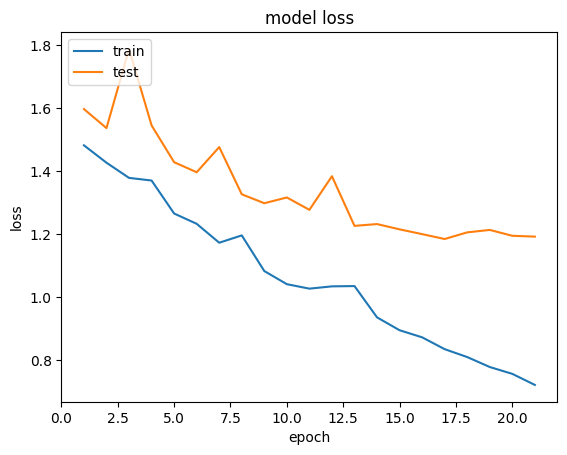

In [109]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#모델 평가

In [110]:
res = model.evaluate(pad_x_test, cat_y_test)
print("\n 테스트 정확도: %.4f" % res[1])

71/71 [==============================] - 1s 8ms/step - loss: 1.1919 - acc: 0.7093

 테스트 정확도: 0.7093


In [111]:
for i in range(395,400):

  pred = model.predict(np.expand_dims(pad_x_test[i],axis=0))

  print(f"{i}번째")
  print(f"모델 예측 : {np.argmax(pred)}, 실값 : {y_test[i]}\n" )

1/1 [==============================] - 0s 29ms/step
395번째
모델 예측 : 3, 실값 : 3

1/1 [==============================] - 0s 31ms/step
396번째
모델 예측 : 3, 실값 : 3

1/1 [==============================] - 0s 36ms/step
397번째
모델 예측 : 16, 실값 : 16

1/1 [==============================] - 0s 43ms/step
398번째
모델 예측 : 9, 실값 : 1

1/1 [==============================] - 0s 33ms/step
399번째
모델 예측 : 19, 실값 : 19



In [104]:
"""
dense sigmoid->softmax 정확도 0.3704 ->  0.3704

Embedding output_dim 32->128
LSTM hidden_layer 128
      정확도 0.3704 -> 0.6585

Embedding output_dim 128
LSTM 256
      정확도 0.6585 -> 0.6919

"""

'\ndense sigmoid->softmax 정확도 0.3704 ->  0.3704\n\nEmbedding output_dim 32->128\nLSTM hidden_layer 128\n      정확도 0.3704 -> 0.6585\n\nEmbedding output_dim 128\nLSTM 256\n      정확도 0.6585 -> 0.6919\n\n'

#6. 모델 사용 - 46개중 10개의 카테고리별 하나씩 뉴스 출력하기



In [112]:
#처음부터 model 사용해 차례대로 예측
#예측한 카테고리가 처음이라면 카테고리와 그 인덱스 저장하고 아니라면 넘어감. 예측한 카테고리 총 개수가 10개가 될 때까지 반복
i = 0
chk_category = np.array([[0,0]])

while len(chk_category) < 11:
  pred = model.predict(np.expand_dims(pad_x_test[i],axis=0))
  res = np.argmax(pred)

  if res in np.array(chk_category[:,0]):
    print("index : ",i)
    print(chk_category.flatten())
  else:
    chk_category = np.append(chk_category, [[res,i]], axis=0)
  i += 1


1/1 [==============================] - 0s 22ms/step
index :  5
[ 0  0  3  0 10  1  1  2  4  3 13  4]
1/1 [==============================] - 0s 25ms/step
index :  6
[ 0  0  3  0 10  1  1  2  4  3 13  4]
1/1 [==============================] - 0s 22ms/step
index :  7
[ 0  0  3  0 10  1  1  2  4  3 13  4]
1/1 [==============================] - 0s 23ms/step
index :  8
[ 0  0  3  0 10  1  1  2  4  3 13  4]
1/1 [==============================] - 0s 21ms/step
index :  9
[ 0  0  3  0 10  1  1  2  4  3 13  4]
1/1 [==============================] - 0s 23ms/step
index :  10
[ 0  0  3  0 10  1  1  2  4  3 13  4]
1/1 [==============================] - 0s 22ms/step
index :  11
[ 0  0  3  0 10  1  1  2  4  3 13  4]
1/1 [==============================] - 0s 23ms/step
index :  12
[ 0  0  3  0 10  1  1  2  4  3 13  4]
1/1 [==============================] - 0s 24ms/step
index :  13
[ 0  0  3  0 10  1  1  2  4  3 13  4]
1/1 [==============================] - 0s 22ms/step
index :  14
[ 0  0  3  0 10  1  1  

In [113]:
#카테고리, index (첫 데이터는 더미데이터)
chk_category

array([[ 0,  0],
       [ 3,  0],
       [10,  1],
       [ 1,  2],
       [ 4,  3],
       [13,  4],
       [20, 15],
       [19, 18],
       [ 9, 24],
       [25, 27],
       [21, 41]])

In [114]:
for cat, label in chk_category[1:]:
  print(f"category : {cat}")
  print(' '.join([index_to_word[index] for index in x_train[label]]))
  print()

category : 3
<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

category : 10
<sos> <unk> de <unk> <unk> lt <unk> <unk> and lt <unk> overseas corp of chicago have each taken 50 pct <unk> in <unk> company <unk> <unk> factors <unk> de <unk> said in a statement it gave no financial details of the transaction <unk> <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3

category : 1
<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 <unk> 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earni